In [1]:
''' Import Modules'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
pd.options.display.float_format ='{:.2f}'.format
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('movies_complete.csv')

In [4]:
# mencari kata yang paling bnyk di tagline, title, dan overview
# cleaning Na

tagline = df.tagline.dropna()
title = df.title.dropna()
overview = df.overview.dropna()

In [5]:
# menggabungkan semua title menjadi 1
join_title = ' '.join(title)
join_overview = ' '.join(overview)
join_tagline = ' '.join(tagline)

In [6]:
# Visualisasi tagline
title_wordcloud = WordCloud(background_color='white', height=2000, width=400, max_words=200).generate(join_title)
title_wordcloud

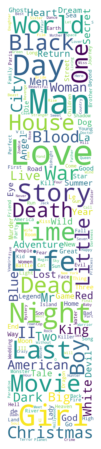

In [7]:
plt.figure(figsize = (16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [9]:
df['Franchise'] = df.belongs_to_collection.notna()

In [10]:
df.Franchise

0         True
1        False
2         True
3        False
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: Franchise, Length: 44691, dtype: bool

In [11]:
# Franchise vs stand alone average revenue
df.groupby('Franchise').revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

In [12]:
# Franchise vs stand alone average budget
df.groupby('Franchise').budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

In [13]:
#average popularity
df.groupby('Franchise').popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

In [14]:
#average ratings
df.groupby('Franchise').vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [15]:
df['ROI'] = df.revenue_musd.div(df.budget_musd)

In [16]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

In [17]:
# Aggregate some terms in succesfull Franchise
Fran_vs_alone = df.groupby('Franchise').agg({'budget_musd':"mean",'revenue_musd':'mean', 'vote_average':"mean",
                            "popularity":"mean", "ROI":"median", "vote_count":"mean"})

In [18]:
#list Franchises by total number of movies
df.belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
44686                               NaN
44687                               NaN
44688                               NaN
44689                               NaN
44690                               NaN
Name: belongs_to_collection, Length: 44691, dtype: object

In [19]:
df.belongs_to_collection.value_counts()

The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: belongs_to_collection, Length: 1691, dtype: int64

In [20]:
franchise = df.groupby("belongs_to_collection").agg({"title" :"count", "budget_musd":["sum","mean"], "revenue_musd": ["sum", "mean"],
                                    "vote_average":"mean", "popularity":'mean', "ROI":"median", "vote_count":"mean" })

In [21]:
franchise.nlargest(20,("title","count"))

title budget_musd       revenue_musd  \
                                       count         sum  mean          sum   
belongs_to_collection                                                         
The Bowery Boys                           29        0.00   NaN         0.00   
Totò Collection                           27        0.00   NaN         0.00   
James Bond Collection                     26     1539.65 59.22      7106.97   
Zatôichi: The Blind Swordsman             26        0.00   NaN         0.00   
The Carry On Collection                   25        0.00   NaN         0.00   
Charlie Chan (Sidney Toler) Collection    21        0.00   NaN         0.00   
Pokémon Collection                        20      250.72 50.14       601.87   
Godzilla (Showa) Collection               16        2.81  0.56         0.00   
Charlie Chan (Warner Oland) Collection    15        0.00   NaN         0.00   
Dragon Ball Z (Movie) Collection          15        5.00  5.00       112.12   
Uuno Turhapuro                            15        0.00   NaN         0.00   
Monster High Collection                   14        0.50  0.50         0.00   
The Land Before Time Collection           14       12.30 12.30        84.46   
George Carlin Comedy Collection           13        0.00   NaN         0.00   
Sharpe Collection                         13        0.00   NaN         0.00   
Friday the 13th Collection                12       84.40  7.03       464.90   
Johan Falk GSI Collection                 12        0.00   NaN         0.00   
Sherlock Holmes (1939 series)             12        0.00   NaN         0.00   
The Amityville Horror Collection          12       21.02  5.25       213.35   
An American Girl Collection               10        6.80  6.80         0.00   

                                              vote_average popularity    ROI  \
                                         mean         mean       mean median   
belongs_to_collection                                                          
The Bowery Boys                           NaN         6.67       0.20    NaN   
Totò Collection                           NaN         6.84       1.05    NaN   
James Bond Collection                  273.35         6.34      13.45   6.13   
Zatôichi: The Blind Swordsman             NaN         6.40       1.10    NaN   
The Carry On Collection                   NaN         6.17       3.22    NaN   
Charlie Chan (Sidney Toler) Collection    NaN         6.61       0.63    NaN   
Pokémon Collection                      66.87         6.05       4.37   4.46   
Godzilla (Showa) Collection               NaN         5.97       3.42    NaN   
Charlie Chan (Warner Oland) Collection    NaN         6.66       0.66    NaN   
Dragon Ball Z (Movie) Collection        56.06         6.61       6.18  12.35   
Uuno Turhapuro                            NaN         5.53       0.17    NaN   
Monster High Collection                   NaN         6.49       3.59    NaN   
The Land Before Time Collection         84.46         6.16       4.91   6.87   
George Carlin Comedy Collection           NaN         7.47       1.30    NaN   
Sharpe Collection                         NaN         6.74       1.71    NaN   
Friday the 13th Collection              38.74         5.42       9.76   6.67   
Johan Falk GSI Collection                 NaN         6.50       1.52    NaN   
Sherlock Holmes (1939 series)             NaN         6.92       2.88    NaN   
The Amityville Horror Collection        53.34         4.36       7.18   5.69   
An American Girl Collection               NaN         5.25       1.94    NaN   

                                       vote_count  
                                             mean  
belongs_to_collection                              
The Bowery Boys                              0.72  
Totò Collection                             18.04  
James Bond Collection                     1284.31  
Zatôichi: The Blind Swordsman               11.19  
The Carry On Col

In [22]:
#Franchise by total revenue
franchise_byRev = franchise.nlargest(20,('budget_musd','sum'))


In [23]:
# Top Franchise by Total or average revenue
franchise_x = franchise.nlargest(20,('revenue_musd','sum'or'mean'))

In [24]:
# DF [df[kriteria]] >].bla bla bla
# kriteria maksdnya kolom2 nya 
franchise[franchise['vote_count','mean']>1000].nlargest(20,('vote_average','mean'))

title budget_musd        revenue_musd  \
                                    count         sum   mean          sum   
belongs_to_collection                                                       
The Lord of the Rings Collection        3      266.00  88.67      2916.54   
The Godfather Collection                3       73.00  24.33       429.38   
Blade Runner Collection                 1       28.00  28.00        33.14   
The Man With No Name Collection         3        2.00   0.67        35.50   
The Dark Knight Collection              3      585.00 195.00      2463.72   
Guardians of the Galaxy Collection      2      370.00 185.00      1636.74   
Kill Bill Collection                    2       60.00  30.00       333.11   
Kingsman Collection                     1       81.00  81.00       414.35   
How to Train Your Dragon Collection     2      310.00 155.00      1104.00   
Harry Potter Collection                 8     1280.00 160.00      7707.37   
Toy Story Collection                    3      320.00 106.67      1937.89   
Back to the Future Collection           3       99.00  33.00       957.64   
Trainspotting Collection                2       22.00  11.00        57.90   
Deadpool Collection                     1       58.00  58.00       783.11   
The Incredibles Collection              1       92.00  92.00       631.44   
Star Wars Collection                    8      854.35 106.79      7434.49   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Lego Movie Collection               2      140.00  70.00       781.11   
Tangled Collection                      2      260.00 260.00       591.79   
The Space Odyssey Series                2       38.50  19.25       109.10   

                                            vote_average popularity    ROI  \
                                       mean         mean       mean median   
belongs_to_collection                                                        
The Lord of the Rings Collection     972.18         8.03      30.27  11.73   
The Godfather Collection             143.13         7.97      31.64   3.66   
Blade Runner Collection               33.14         7.90      96.27   1.18   
The Man With No Name Collection       11.83         7.83      14.17  25.00   
The Dark Knight Collection           821.24         7.80      57.42   4.34   
Guardians of the Galaxy Collection   818.37         7.75     119.31   4.43   
Kill Bill Collection                 166.55         7.70      23.40   5.55   
Kingsman Collection                  414.35         7.60      28.22   5.12   
How to Train Your Dragon Collection  552.00         7.55      13.34   3.60   
Harry Potter Collection              963.42         7.54      26.25   6.17   
Toy Story Collection                 645.96         7.53      18.82   5.53   
Back to the Future Collection        319.21         7.50      17.50   8.30   
Trainspotting Collection              28.95         7.45      18.50   3.21   
Deadpool Collection                  783.11         7.40     187.86  13.50   
The Incredibles Collection           631.44         7.40      22.22   6.86   
Star Wars Collection                 929.31         7.38      23.41   8.24   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Lego Movie Collection            390.56         7.35      16.74   5.86   
Tangled Collection                   591.79         7.25      12.32   2.28   
The Space Odyssey Series              54.55         7.25      14.99   3.99   

                                    vote_count  
                                          mean  
belongs_to_collection                           
The Lord of the Rings Collection       8253.00  
The Godfather Collection               3677.00  
Blade Runner Collection                3833.00  
The Man With No Name Collection        1422.67  
The Dark Knight Collection             9681.00  
Guardians of the Galaxy Collection     7436.00  
Kill Bill Collection        